In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import joblib

## Data Exploration:

In [2]:
df1=pd.read_csv(r'archive/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df2=pd.read_csv(r'archive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df3=pd.read_csv(r'archive/Tuesday-WorkingHours.pcap_ISCX.csv')
df4=pd.read_csv(r'archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df5=pd.read_csv(r'archive/Monday-WorkingHours.pcap_ISCX.csv')
df6=pd.read_csv(r'archive/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df7=pd.read_csv(r'archive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df8=pd.read_csv(r'archive/Wednesday-workingHours.pcap_ISCX.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0, ignore_index=True)

In [4]:
#df = pd.read_csv("archive/Wednesday-workingHours.pcap_ISCX.csv")
df.head()
# 79 columns!!!

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
#Fixing spaces in columns and verifing Labels
df.columns = df.columns.str.strip()
df["Label"].value_counts()
#Data can be used for graph vis 

Label
BENIGN                        2334627
DoS Hulk                       231073
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              3932
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

We can se that there is 5 types of labels each one being a different type of attack

## Pre-Processing

In [7]:
#Checking for nulls

nulls_columns = df.columns[df.isnull().any()].tolist()
df.isna().sum().sum()

np.int64(1371)

In [8]:
nulls_columns
#every null is in the same columns !!!

['Flow Bytes/s']

In [9]:
# checking if nulls has any relationship with Label
df_nulos = df[df.isnull().any(axis=1)]
df_nulos["Label"].value_counts()


Label
DoS Hulk    949
BENIGN      422
Name: count, dtype: int64

In [10]:
#Besisdes it looks like it has relationship with Dos Hulk Label ,decided to drops nulls because of the small relevance to dataset
# But for future tests, nulls could be change for 0 or mean value of the column
df = df.dropna()
df.isna().sum().sum()

np.int64(0)

In [11]:
#Checking for inf
label_save = df
df_check = df.drop(axis=1,labels="Label")
np.isinf(df_check).sum().sum()

np.int64(2494)

In [12]:
# Remove inf from original df
df_check = df_check[~np.isinf(df_check).any(axis=1)]

np.any(np.isinf(df_check))

df = df_check

In [13]:
df["Label"] = label_save["Label"]

In [14]:
## ENCODING Labels into 0 and 1  Attack/Normal
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_test = df
df_test['Label']= encoder.fit_transform(df['Label'])
df_test.value_counts().sum
df_test['Label'] = df_test['Label'].apply(lambda x: 1 if x in [2, 3, 4, 5,6,7,8,9,10,11,12,13] else x)
df_test = df

In [15]:

df["Label"].value_counts()

Label
0    2332983
1     399708
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample
import pandas as pd

# 'Label' contém 0 (classe majoritária) e 1 (classe minoritária)

# Separando as classes majoritária e minoritária
df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1]


df_minority_oversampled = resample(
    df_minority, 
    replace=True,        
    n_samples=len(df_majority),  
    random_state=17       
)

# juntando dataset
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# print dataset final
print("Distribuição das classes após undersampling:")
print(df_balanced['Label'].value_counts())

Distribuição das classes após undersampling:
Label
0    2332983
1    2332983
Name: count, dtype: int64


Choosing most relevants labels for the model

In [17]:
df = df_balanced

In [18]:
#Create a csv with all correlations so we can see better
correlations = df.corr()['Label'].sort_values(ascending=False)
correlations.to_csv('correlations.csv', header=True)
# Shows bests correlations
print(correlations)

Label                     1.000000
Bwd Packet Length Mean    0.579392
Avg Bwd Segment Size      0.579392
Bwd Packet Length Max     0.568353
Bwd Packet Length Std     0.566489
                            ...   
Fwd Avg Packets/Bulk           NaN
Fwd Avg Bulk Rate              NaN
Bwd Avg Bytes/Bulk             NaN
Bwd Avg Packets/Bulk           NaN
Bwd Avg Bulk Rate              NaN
Name: Label, Length: 79, dtype: float64


In [ ]:
# using SelectKBest and f_classif to choose most relevants columns.
from sklearn.feature_selection import SelectKBest , f_classif
X = df.drop(axis=1, labels="Label")
y = df["Label"]

selector = SelectKBest(score_func=f_classif, k=23)
selector.fit(X, y)

/Users/gabriel_goncalves/Desktop/Trabalho_SI/venv_py_3_12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/gabriel_goncalves/Desktop/Trabalho_SI/venv_py_3_12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=23)

In [20]:
mask = selector.get_support()

# Create a new DF with only K bests columns
df_selected = X.loc[:, mask]

In [21]:
df_selected["Label"]= y

/var/folders/xc/cl991pz94vlfh_4hrlpwhgbm0000gn/T/ipykernel_62605/511120660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Label"]= y


In [22]:
#NAO USANDO NO MOMENTO

#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Exemplo de DataFrame

# Calcular a matriz de correlação
#correlation_matrix = df_selected.corr()

# Exibir a matriz de correlação
#print(correlation_matrix)

# Visualizar a matriz de correlação usando um mapa de calor (heatmap)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Matriz de Correlação')
#plt.show()

In [23]:

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4665966 entries, 0 to 953097
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Destination Port        int64  
 1   Flow Duration           int64  
 2   Bwd Packet Length Max   int64  
 3   Bwd Packet Length Min   int64  
 4   Bwd Packet Length Mean  float64
 5   Bwd Packet Length Std   float64
 6   Flow IAT Mean           float64
 7   Flow IAT Std            float64
 8   Flow IAT Max            int64  
 9   Fwd IAT Total           int64  
 10  Fwd IAT Std             float64
 11  Fwd IAT Max             int64  
 12  Min Packet Length       int64  
 13  Max Packet Length       int64  
 14  Packet Length Mean      float64
 15  Packet Length Std       float64
 16  Packet Length Variance  float64
 17  ACK Flag Count          int64  
 18  Average Packet Size     float64
 19  Avg Bwd Segment Size    float64
 20  Idle Mean               float64
 21  Idle Max                int64  
 22  

In [24]:
df_selected.columns

Index(['Destination Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'ACK Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max',
       'Idle Min', 'Label'],
      dtype='object')

In [25]:
df= df_selected

In [26]:
df["Label"].value_counts()

Label
0    2332983
1    2332983
Name: count, dtype: int64

In [27]:
df = df_balanced

## Model

In [28]:
#imports for Model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np


In [29]:


X = df_selected.drop(axis=1, labels="Label")
y = df_selected["Label"]
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#pca = PCA(n_components=6)
#X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17,shuffle=True)

In [30]:

clf = DecisionTreeClassifier(random_state=17, max_depth=10)
#clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=10)
mean_score = np.mean(scores)
var_score = np.var(scores)
std_dev_score = np.std(scores)

print("Scores:", scores)
print("Média dos scores:", mean_score)
print("Variância dos scores:", var_score)
print("Desvio padrão dos scores:", std_dev_score)

Scores: [0.9914873  0.98562357 0.98624509 0.95553122 0.99133299 0.99237029
 0.99156015 0.99051856 0.99052071 0.992471  ]
Média dos scores: 0.9867660883097031
Variância dos scores: 0.00011354547256627219
Desvio padrão dos scores: 0.010655771795898793


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    random_state=17,
    max_depth=17,                
    min_samples_split=10,       
    min_samples_leaf=5,        
    max_features='sqrt'        
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [32]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=17, min_samples_leaf=5, min_samples_split=10,
                       random_state=17)>

In [33]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

Acurácia no Treinamento: 0.9944
Acurácia no Teste: 0.9943

Relatório de Classificação (precision, recall, f1-score):
              precision    recall  f1-score   support

     Benigno       0.99      1.00      0.99    583032
      Ataque       1.00      0.99      0.99    583460

    accuracy                           0.99   1166492
   macro avg       0.99      0.99      0.99   1166492
weighted avg       0.99      0.99      0.99   1166492



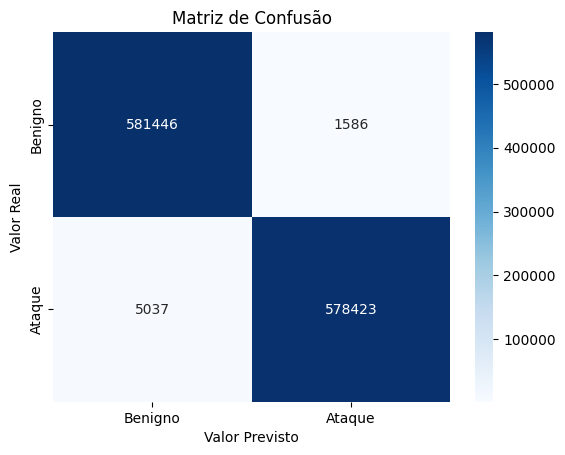

Validação Cruzada (5-fold): Média = 0.9943, Desvio Padrão = 0.0001


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Treinamento do modelo
#model = DecisionTreeClassifier(random_state=17)
#model.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Acurácia do treino e teste
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Exibindo as métricas detalhadas (precisão, recall, f1-score)
print(f'Acurácia no Treinamento: {train_accuracy:.4f}')
print(f'Acurácia no Teste: {test_accuracy:.4f}')

# Relatório de classificação
print("\nRelatório de Classificação (precision, recall, f1-score):")
print(classification_report(y_test, y_pred, target_names=["Benigno", "Ataque"]))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benigno", "Ataque"], yticklabels=["Benigno", "Ataque"])
plt.title("Matriz de Confusão")
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Validação Cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Validação Cruzada (5-fold): Média = {cv_scores.mean():.4f}, Desvio Padrão = {cv_scores.std():.4f}')

In [35]:
# Obter as probabilidades de cada classe
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1 (ataque)
# Ajuste do limiar para 0.3
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

# Relatório de classificação
print(classification_report(y_test, y_pred_adjusted))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    583032
           1       0.99      1.00      0.99    583460

    accuracy                           0.99   1166492
   macro avg       0.99      0.99      0.99   1166492
weighted avg       0.99      0.99      0.99   1166492

[[576833   6199]
 [   879 582581]]


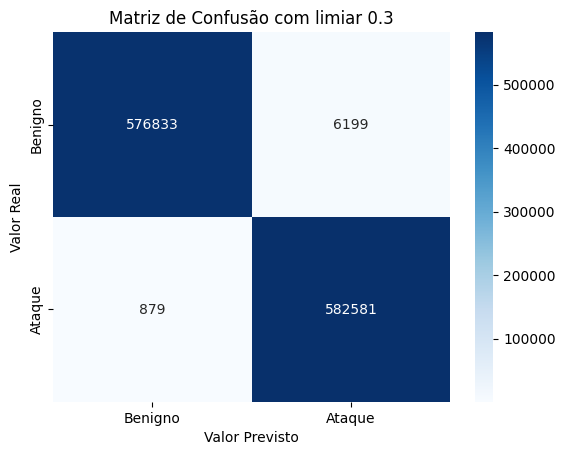

In [66]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Exibindo a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benigno", "Ataque"], yticklabels=["Benigno", "Ataque"])
plt.title("Matriz de Confusão com limiar 0.3")
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

In [37]:
joblib.dump(model, 'RF_Last_model.joblib')

['RF_Last_model.joblib']

In [38]:
import matplotlib as plt

In [39]:
joblib.dump(clf, 'random_forest_model_2-.joblib')

['random_forest_model_2-.joblib']

## Modelo ANN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2 , l1

In [41]:
y= y.astype(bool)

In [54]:


# 1. Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, shuffle=True)

# 2. Normalizando os dados (usando StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Definindo o modelo 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  

    Dropout(0.5),  
    Dense(8, activation='relu'),  

    Dropout(0.5),
      
    Dense(1, activation='sigmoid')  #  nao precisa de relu pois so queremos 0 ou 1 
])

# 4. Definindo o EarlyStopping para evitar overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# 5. Compilando o modelo
model.compile(optimizer="adam",
              loss="BinaryCrossentropy",
              metrics=['accuracy'])



history = model.fit(
    X_train, y_train, 
    validation_split=0.25,  
    epochs=10,  
    batch_size=32,
     
    verbose=1,
    callbacks=[early_stopping]
)

# 7. Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss no teste: {loss:.4f}")
print(f"Acurácia no teste: {accuracy:.4f}")

Epoch 1/10


/Users/gabriel_goncalves/Desktop/Trabalho_SI/venv_py_3_12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82019/82019 ━━━━━━━━━━━━━━━━━━━━ 37s 448us/step - accuracy: 0.8910 - loss: 0.2468 - val_accuracy: 0.9516 - val_loss: 0.1396
Epoch 2/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 37s 452us/step - accuracy: 0.9138 - loss: 0.2031 - val_accuracy: 0.9527 - val_loss: 0.1339
Epoch 3/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 37s 446us/step - accuracy: 0.9156 - loss: 0.1996 - val_accuracy: 0.9482 - val_loss: 0.1212
Epoch 4/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 37s 454us/step - accuracy: 0.9180 - loss: 0.1954 - val_accuracy: 0.9728 - val_loss: 0.1141
Epoch 5/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 37s 449us/step - accuracy: 0.9204 - loss: 0.1929 - val_accuracy: 0.9636 - val_loss: 0.1076
Epoch 6/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 35s 423us/step - accuracy: 0.9224 - loss: 0.1890 - val_accuracy: 0.9617 - val_loss: 0.1081
Epoch 7/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 35s 420us/step - accuracy: 0.9224 - loss: 0.1884 - val_accuracy: 0.9733 - val_loss: 0.1021
Epoch 8/10
82019/82019 ━━━━━━━━━━━━━━━━━━━━ 35s 427us/step - accur

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

# 6. Prevendo as classes para os dados de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Previsões binárias (0 ou 1)

# 7. Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# 8. Gerando o relatório de classificação (precisão, recall, F1-score)
cr = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(cr)

36453/36453 ━━━━━━━━━━━━━━━━━━━━ 7s 193us/step
Matriz de Confusão:
[[567796  15236]
 [ 16202 567258]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97    583032
        True       0.97      0.97      0.97    583460

    accuracy                           0.97   1166492
   macro avg       0.97      0.97      0.97   1166492
weighted avg       0.97      0.97      0.97   1166492



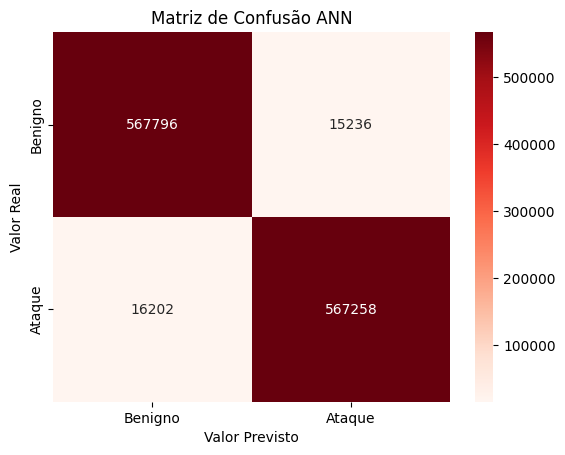

In [71]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Exibindo a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Benigno", "Ataque"], yticklabels=["Benigno", "Ataque"])
plt.title("Matriz de Confusão ANN")
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

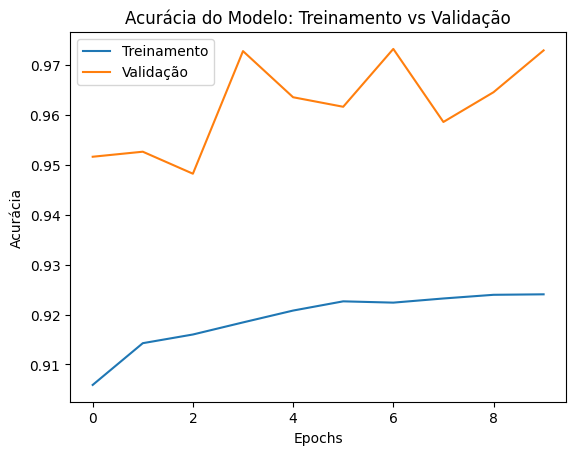

In [57]:
# Acurácia no treinamento e teste
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='Treinamento')
plt.plot(val_accuracy, label='Validação')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia do Modelo: Treinamento vs Validação')
plt.show()

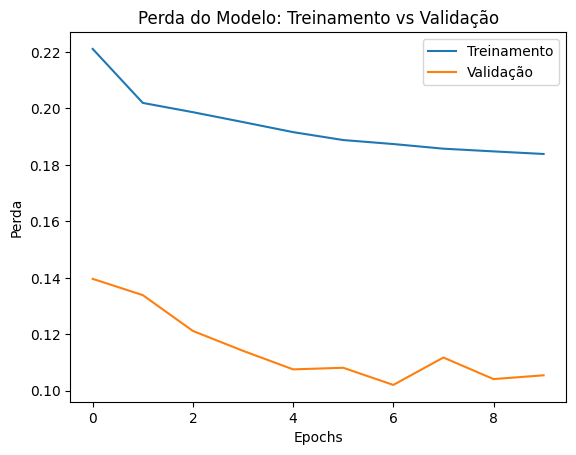

In [58]:
# Perda no treinamento e validação
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Treinamento')
plt.plot(val_loss, label='Validação')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda do Modelo: Treinamento vs Validação')
plt.show()

In [59]:
train_loss

[0.22102776169776917,
 0.2019132822751999,
 0.19863319396972656,
 0.1951313316822052,
 0.19157136976718903,
 0.1887689083814621,
 0.1873525083065033,
 0.1857108473777771,
 0.1847531646490097,
 0.183834508061409]

In [60]:
val_loss

[0.13962455093860626,
 0.13386254012584686,
 0.12118031829595566,
 0.11414898186922073,
 0.10757958889007568,
 0.10814816504716873,
 0.10207381844520569,
 0.11177325993776321,
 0.1041400283575058,
 0.10548245906829834]

In [72]:
joblib.dump(model, 'ANN_model.joblib')

['ANN_model.joblib']